In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [34]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import numpy as np

# Análise Exploratória


### Explorando dataset


In [65]:
image_paths = []
# Pasta com as imagens importadas
folder_path = '/content/drive/MyDrive/pose_estimation_ponderada/animalpose_image_part2'

for root, dirs, files in os.walk(folder_path):
    for file in files:
        if file.endswith(('.jpg', '.jpeg', '.png')):
            image_paths.append(os.path.join(root, file))

df_images = pd.DataFrame({'image_path': image_paths})

# Extraindo as classes pelo caminho
df_images['class'] = df_images['image_path'].apply(lambda x: os.path.basename(os.path.dirname(x)))

# Contando imagens por classe
class_counts = df_images.groupby('class')['image_path'].count()

print(class_counts)


class
cat      200
cow      200
dog      200
horse    200
sheep    200
Name: image_path, dtype: int64


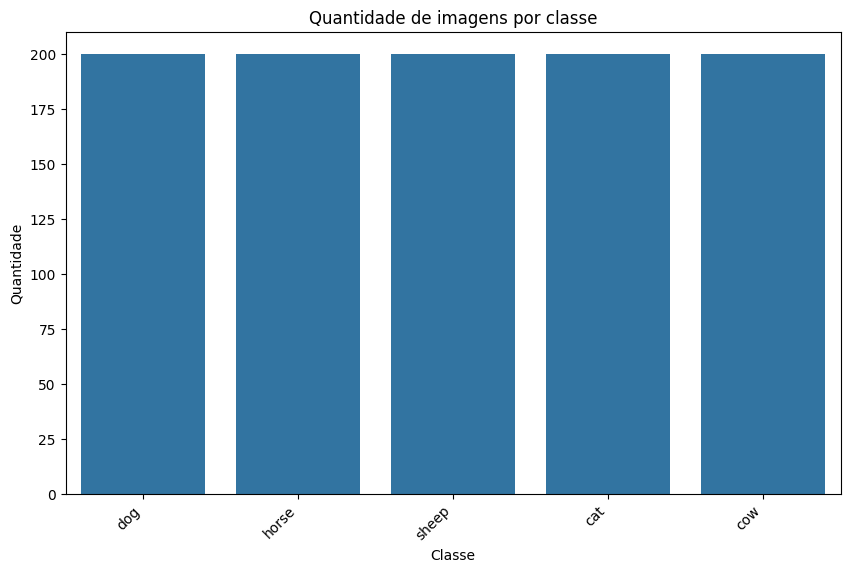

In [66]:
# Gráfico mostrando a relação de quantidade
plt.figure(figsize=(10, 6))
sns.countplot(x='class', data=df_images)
plt.title('Quantidade de imagens por classe')
plt.xlabel('Classe')
plt.ylabel('Quantidade')
plt.xticks(rotation=45, ha='right')
plt.show()


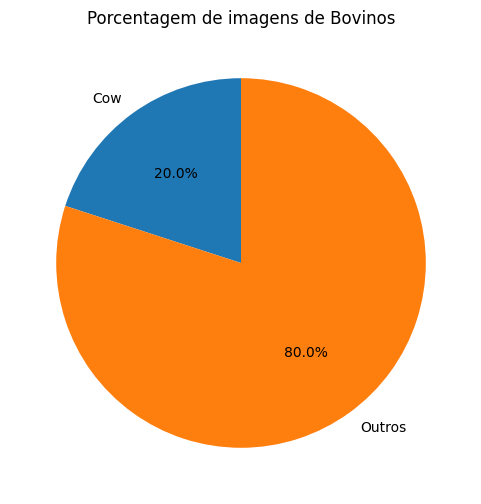

Porcentagem de imagens de Bovinos: 20.00%


In [67]:
# Porcentagem de imagens de bovinos em relação ao todo
cow_count = class_counts.get('cow', 0)
total_count = class_counts.sum()
cow_percentage = (cow_count / total_count) * 100 if total_count > 0 else 0

# Pie Chart
plt.figure(figsize=(6, 6))
plt.pie([cow_count, total_count - cow_count], labels=['Cow', 'Outros'], autopct='%1.1f%%', startangle=90)
plt.title('Porcentagem de imagens de Bovinos')
plt.show()

# Porcentagem
print(f"Porcentagem de imagens de Bovinos: {cow_percentage:.2f}%")


### Explorando o arquivo de keypoints


In [68]:
# Carregar o arquivo JSON dos keypoints
keypoints_file = '/content/drive/MyDrive/pose_estimation_ponderada/animalpose_keypoint_new/keypoints.json'
with open(keypoints_file, 'r') as f:
    keypoints_data = json.load(f)

# Converter as anotações e categorias em dataframes
annotations_df = pd.DataFrame(keypoints_data['annotations'])
categories_df = pd.DataFrame(keypoints_data['categories'])

# Contagem de categorias nas anotações
category_counts = annotations_df['category_id'].value_counts()

# Exibir dataframe das anotações
print("Visão Geral das Anotações:")
annotations_df.head()


Visão Geral das Anotações:


,image_id,bbox,keypoints,num_keypoints,category_id
0,1,"[123, 115, 379, 275]","[[193, 216, 1], [160, 217, 1], [174, 261, 1], ...",20,1
1,2,"[25, 34, 419, 271]","[[330, 84, 1], [245, 91, 1], [290, 137, 1], [3...",20,3
2,3,"[54, 50, 285, 262]","[[275, 102, 1], [247, 105, 1], [269, 156, 1], ...",20,4
3,4,"[100, 96, 355, 324]","[[0, 0, 0], [327, 161, 1], [350, 192, 1], [333...",20,4
4,5,"[71, 252, 216, 314]","[[103, 269, 1], [86, 269, 1], [92, 284, 1], [1...",20,5


In [69]:
# Informações básicas
num_annotations = annotations_df['image_id'].nunique()
num_categories = categories_df['id'].nunique()
category_names = categories_df['name'].unique()

summary = {
    "Total de Imagens Anotadas": num_annotations,
    "Total de Categorias": num_categories,
    "Categorias": list(category_names)
}

print("Resumo das Informações:")
print(summary)

Resumo das Informações:
{'Total de Imagens Anotadas': 4608, 'Total de Categorias': 5, 'Categorias': ['dog', 'cat', 'sheep', 'horse', 'cow']}


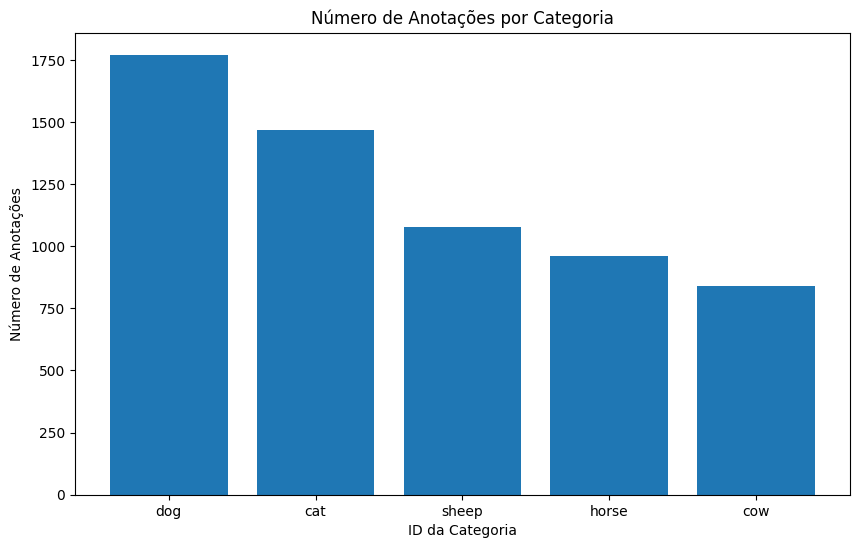

In [70]:
# Gráfico para visualizar a distribuição por categoria
plt.figure(figsize=(10, 6))

# Gráfico de barras para o número de imagens por categoria
plt.bar(category_counts.index, category_counts.values)
plt.xticks(category_counts.index, [categories_df.loc[categories_df['id'] == cid, 'name'].values[0] for cid in category_counts.index])
plt.title('Número de Anotações por Categoria')
plt.xlabel('ID da Categoria')
plt.ylabel('Número de Anotações')
plt.show()

# Filtrando o dataset apenas com bovinos

In [73]:
# Dataset de imagens
dataset_folder = folder_path + '/cow'
dataset_images = os.listdir(dataset_folder)
dataset_images = [img for img in dataset_images if img.endswith('.jpeg')]

# Extrai annotations e imagens
annotations = keypoints_data.get('annotations', [])
images_info = keypoints_data.get('images', {})

if isinstance(images_info, dict):
    image_id_to_filename = {str(key): value for key, value in images_info.items()}
else:
    image_id_to_filename = {str(image['id']): image['file_name'] for image in images_info}

# Filtrando os keypoints para bovinos com os nomes das imagens
cow_keypoints = [annotation for annotation in annotations
                 if annotation['category_id'] == 5 and image_id_to_filename.get(str(annotation['image_id'])) in dataset_images]

df_cow_keypoints = pd.DataFrame(cow_keypoints)

# Display
print(f"Tamanho do dataset: {df_cow_keypoints.shape}")
df_cow_keypoints.head()

Tamanho do dataset: (200, 5)


,image_id,bbox,keypoints,num_keypoints,category_id
0,3809,"[39, 42, 265, 184]","[[78, 73, 1], [58, 74, 1], [64, 96, 1], [90, 6...",20,5
1,3810,"[31, 16, 249, 212]","[[172, 85, 1], [105, 86, 1], [130, 148, 1], [2...",20,5
2,3811,"[27, 15, 265, 199]","[[0, 0, 0], [235, 35, 1], [261, 50, 1], [238, ...",20,5
3,3812,"[13, 25, 297, 197]","[[275, 67, 1], [248, 70, 1], [269, 94, 1], [28...",20,5
4,3813,"[3, 50, 273, 234]","[[0, 0, 0], [251, 87, 1], [270, 113, 1], [220,...",20,5


In [74]:
# Filtra o dataframe de imagens com apenas a classe de bovinos -> 'cow'
df_cows_images = df_images[df_images['class'] == 'cow']

# Display
print(f"Tamanho do dataset: {df_cows_images.shape}")
df_cows_images.head()

Tamanho do dataset: (200, 2)


,image_path,class
800,/content/drive/MyDrive/pose_estimation_pondera...,cow
801,/content/drive/MyDrive/pose_estimation_pondera...,cow
802,/content/drive/MyDrive/pose_estimation_pondera...,cow
803,/content/drive/MyDrive/pose_estimation_pondera...,cow
804,/content/drive/MyDrive/pose_estimation_pondera...,cow


# Tentando treinar modelo de Pose Estimation

## Mexendo nas annotations


In [43]:

coco_format = {
    "images": [],
    "annotations": [],
    "categories": [
        {
            "supercategory": "animal",
            "id": 1,
            "name": "cow",
            "keypoints": ["left_eye", "right_eye", "nose", "left_ear", "right_ear",
                          "left_front_elbow", "right_front_elbow", "left_back_elbow",
                          "right_back_elbow", "left_front_knee", "right_front_knee",
                          "left_back_knee", "right_back_knee", "left_front_paw",
                          "right_front_paw", "left_back_paw", "right_back_paw",
                          "throat", "withers", "tailbase"],
            "skeleton": [[0, 1], [0, 2], [1, 2], [3, 4], [5, 6], [7, 8], [9, 10]]
        }
    ]
}

annotation_id = 0

for image_id, image_info in enumerate(os.listdir(dataset_folder), start=1):
    if image_info.endswith('.jpeg'):
        image_path = os.path.join(dataset_folder, image_info)

        coco_format["images"].append({
            "file_name": image_info,
            "id": image_id,
            "width": 640,
            "height": 480 
        })

        keypoints = keypoints_data.get(str(image_id), None)
        if keypoints:
 
            bbox = [100, 100, 200, 300] 

        
            coco_format["annotations"].append({
                "image_id": image_id,
                "category_id": 1,
                "keypoints": keypoints, 
                "num_keypoints": len([k for k in keypoints if k > 0]) // 3,  
                "bbox": bbox,
                "id": annotation_id
            })

            annotation_id += 1


output_path = '/content/drive/MyDrive/pose_estimation_ponderada/animalpose_keypoint_new/coco_annotations.json'
with open(output_path, 'w') as outfile:
    json.dump(coco_format, outfile)


In [47]:

output_path = '/content/drive/MyDrive/pose_estimation_ponderada/animalpose_keypoint_new/coco_annotations.json'
with open(output_path, 'r') as outfile:
    coco_format = json.load(outfile)

df_images = pd.DataFrame(coco_format['images'])
df_annotations = pd.DataFrame(coco_format['annotations'])


print("Images DataFrame:")
print(df_images)
print("\nAnnotations DataFrame:")
print(df_annotations)


Images DataFrame:
      file_name   id  width  height
0    co103.jpeg    1    640     480
1    co188.jpeg    2    640     480
2     co91.jpeg    3    640     480
3     co68.jpeg    4    640     480
4     co28.jpeg    5    640     480
..          ...  ...    ...     ...
195   co52.jpeg  196    640     480
196   co24.jpeg  197    640     480
197  co144.jpeg  198    640     480
198  co190.jpeg  199    640     480
199   co97.jpeg  200    640     480

[200 rows x 4 columns]

Annotations DataFrame:
Empty DataFrame
Columns: []
Index: []
